In [1]:
#This code is for calculating the distance between clusters 
#File needed is the Excel file 'DataCalled' in the folder 'evaluated_by_????' after running the neural network clustering algorithm

/var/folders/0x/7d2l8d6s7k50f8jcwd08w_gr0000gn/T/ipykernel_44600/214237724.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'ClusterID': cluster_id, 'NearestClusterID': nearest_cluster_id,
/var/folders/0x/7d2l8d6s7k50f8jcwd08w_gr0000gn/T/ipykernel_44600/214237724.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'ClusterID': cluster_id, 'NearestClusterID': nearest_cluster_id,
/var/folders/0x/7d2l8d6s7k50f8jcwd08w_gr0000gn/T/ipykernel_44600/214237724.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'ClusterID': cluster_id, 'NearestClusterID': nearest_cluster_id,
/var/folders/0x/7d2l8d6s7k50f8jcwd08w_gr0000gn/T/ipykernel_44600

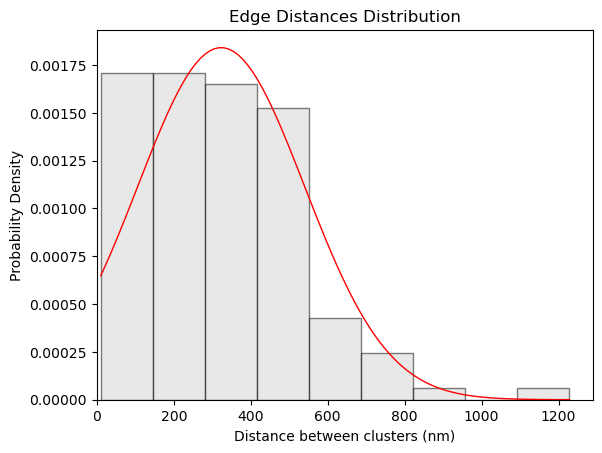

Mean Edge Distance (nm) for Multimers.csv: 323.016171796011


/var/folders/0x/7d2l8d6s7k50f8jcwd08w_gr0000gn/T/ipykernel_44600/214237724.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'ClusterID': cluster_id, 'NearestClusterID': nearest_cluster_id,
/var/folders/0x/7d2l8d6s7k50f8jcwd08w_gr0000gn/T/ipykernel_44600/214237724.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'ClusterID': cluster_id, 'NearestClusterID': nearest_cluster_id,
/var/folders/0x/7d2l8d6s7k50f8jcwd08w_gr0000gn/T/ipykernel_44600/214237724.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'ClusterID': cluster_id, 'NearestClusterID': nearest_cluster_id,
/var/folders/0x/7d2l8d6s7k50f8jcwd08w_gr0000gn/T/ipykernel_44600

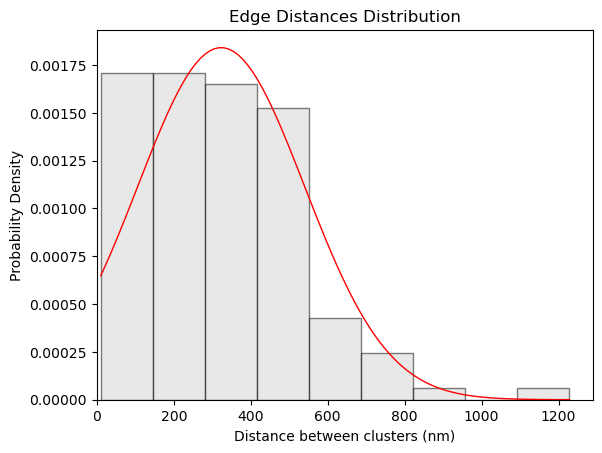

Mean Edge Distance (nm) for Multimers copy.csv: 323.016171796011


In [11]:
import os
import glob
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from scipy.stats import norm
import matplotlib.pyplot as plt

# Get a list of all CSV files in the current directory
csv_files = glob.glob('*.csv')

# Loop through all the CSV files in the folder
for csv_file in csv_files:
    # Initialize an empty DataFrame to store the results for each file
    result_df = pd.DataFrame(columns=['ClusterID', 'NearestClusterID', 'EdgeDistance'])

    # Read the CSV file into a DataFrame
    data = pd.read_csv(csv_file)

    # Exclude clusterID 0
    data = data[data['clusterID'] != 0]

    # Group the data by clusterID
    clusters = data.groupby('clusterID')

    # Calculate the nearest edges distances between clusters
    for cluster_id, group in clusters:
        cluster_coordinates = group[['x', 'y']].values

        min_distance_edges = float('inf')
        nearest_cluster_id = None

        for other_cluster_id, other_group in clusters:
            if other_cluster_id != cluster_id:
                other_cluster_coordinates = other_group[['x', 'y']].values

                # Calculate the distance between cluster edges
                distances_edges = cdist(cluster_coordinates, other_cluster_coordinates, metric='euclidean')
                min_dist_edges = np.min(distances_edges)

                if min_dist_edges < min_distance_edges:
                    min_distance_edges = min_dist_edges
                    nearest_cluster_id = other_cluster_id

        result_df = result_df.append({'ClusterID': cluster_id, 'NearestClusterID': nearest_cluster_id,
                                      'EdgeDistance': min_distance_edges}, ignore_index=True)

    # Save the result DataFrame to a new CSV file
    result_file_name = f'result_{os.path.splitext(os.path.basename(csv_file))[0]}.csv'
    result_df.to_csv(result_file_name, index=False)

    # Plot the edge distances as a histogram
    plt.hist(result_df['EdgeDistance'], bins='auto', density=True, alpha=0.5, color='lightgrey', edgecolor='black')

    # Fit a Gaussian distribution to the edge distances
    mu, std = norm.fit(result_df['EdgeDistance'])
    x = np.linspace(min(result_df['EdgeDistance']), max(result_df['EdgeDistance']), 100)
    y = norm.pdf(x, mu, std)
    plt.plot(x, y, 'r-', linewidth=1)
    plt.xlim(0)

    # Set the plot title and labels
    plt.title('Edge Distances Distribution')
    plt.xlabel('Distance between clusters (nm)')
    plt.ylabel('Probability Density')

    # Save the plot as an image file
    plot_filename = f'edge_distances_plot_{os.path.splitext(os.path.basename(csv_file))[0]}.png'
    plt.savefig(plot_filename)

    # Show the plot
    plt.show()

    # Print mean edge distance
    mean_edge_distance = np.mean(result_df['EdgeDistance'])
    print(f"Mean Edge Distance (nm) for {csv_file}: {mean_edge_distance}")
